In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import KFold
from sklearn import metrics


In [2]:
csv_data = pd.read_csv('database_8f.csv')

In [3]:
csv_data = csv_data.drop('Unnamed: 0',axis = 1)   #消除第0行

In [4]:
'''label_name = {
    0:'success',
    1:'fail',
    2:'noExtusion'
}

csv_data['label'] = csv_data['label'].map(label_name)   #將label的0 1 2置換成列印狀態
'''
csv_data

,HG_mostNum,HG_std,HG_val,HG_entropy,GLCM_asm,GLCM_contrast,GLCM_entropt,GLCM_idm,label
0,7,4.218388,0.658659,3.568960,1.000000,0.000000,0.000000,1.000000,0
1,7,4.039544,0.664035,3.490376,1.000000,0.000000,0.000000,1.000000,0
2,24,12.329679,0.734958,5.047266,1.000000,0.000000,0.000000,1.000000,0
3,10,10.854882,0.676083,4.867942,1.000000,0.000000,0.000000,1.000000,0
4,11,8.830020,0.640324,4.548501,1.000000,0.000000,0.000000,1.000000,0
5,10,10.374794,0.669042,4.671535,1.000000,0.000000,0.000000,1.000000,0
6,11,18.659241,0.725560,5.227786,1.000000,0.000000,0.000000,1.000000,0
7,7,4.420097,0.720220,3.611113,1.000000,0.000000,0.000000,1.000000,0
8,6,5.418079,0.758399,3.899330,1.000000,0.000000,0.000000,1.000000,0
9,6,4.433054,0.732694,3.631464,1.000000,0.000000,0.000000,1.000000,0


In [5]:
# 判斷是否重複
csv_data.duplicated()
#移除重複數據
csv_data = csv_data.drop_duplicates()
csv_data

,HG_mostNum,HG_std,HG_val,HG_entropy,GLCM_asm,GLCM_contrast,GLCM_entropt,GLCM_idm,label
0,7,4.218388,0.658659,3.568960,1.000000,0.000000,0.000000,1.000000,0
1,7,4.039544,0.664035,3.490376,1.000000,0.000000,0.000000,1.000000,0
2,24,12.329679,0.734958,5.047266,1.000000,0.000000,0.000000,1.000000,0
3,10,10.854882,0.676083,4.867942,1.000000,0.000000,0.000000,1.000000,0
4,11,8.830020,0.640324,4.548501,1.000000,0.000000,0.000000,1.000000,0
5,10,10.374794,0.669042,4.671535,1.000000,0.000000,0.000000,1.000000,0
6,11,18.659241,0.725560,5.227786,1.000000,0.000000,0.000000,1.000000,0
7,7,4.420097,0.720220,3.611113,1.000000,0.000000,0.000000,1.000000,0
8,6,5.418079,0.758399,3.899330,1.000000,0.000000,0.000000,1.000000,0
9,6,4.433054,0.732694,3.631464,1.000000,0.000000,0.000000,1.000000,0


In [6]:
display(csv_data.describe())      #使用describe()函數查看每一列的描述性統計量

,HG_mostNum,HG_std,HG_val,HG_entropy,GLCM_asm,GLCM_contrast,GLCM_entropt,GLCM_idm,label
count,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000
mean,88.818920,21.511299,0.398281,5.116770,0.719577,0.070056,0.559147,0.965003,0.674057
std,62.582484,17.369348,0.402660,0.965350,0.251420,0.072683,0.484133,0.036301,0.695438
min,0.000000,2.161411,0.016316,1.996114,0.173564,0.000000,0.000000,0.811594,0.000000
25%,12.000000,7.160578,0.100237,4.303568,0.478168,0.000000,0.000000,0.943841,0.000000
50%,112.000000,16.586874,0.200626,5.212415,0.750158,0.048913,0.548345,0.975543,1.000000
75%,137.000000,29.240006,0.608145,5.844652,1.000000,0.112319,0.958206,1.000000,1.000000
max,193.000000,100.997025,1.979039,7.211319,1.000000,0.376812,1.852443,1.000000,2.000000


###  進行validation 將資料分為五等分    其中四等拿來train 一等拿來test  ,故可訓練出五種分類器

In [7]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
model = SVC(C = 1.0 ,kernel = 'rbf' ,random_state=0 ,decision_function_shape = 'ovo',gamma = 1)
Features = csv_data.drop('label',axis=1)
Label = csv_data['label']

In [8]:
accuracies = []
confmats = []
for train_index, test_index in k_fold.split(Label):
    #print(np.shape(test_index))
    #print(np.shape(train_index))
    trained = model.fit(Features.loc[train_index].values, Label.loc[train_index].values)
    X_test = Features.loc[test_index].values
    y_test = Label.loc[test_index].values
    accuracies.append(trained.score(X_test, y_test))
    y_pred = model.predict(X_test)
    confmats.append(metrics.confusion_matrix(y_test, y_pred))
    

In [9]:
accuracies  #五個模型的準確度

[0.8897038848139093,
 0.89133387666395,
 0.887922836571118,
 0.8941719875016981,
 0.8895530498573564]

In [10]:
acc = np.array(accuracies)
print("平均值 = {:f}".format(np.average(acc)))              #沒有作特徵判斷的話  0.941756
print("標準差 = {:f}".format(np.std(acc)))                  #                  0.006991

平均值 = 0.890537
標準差 = 0.002114


In [ ]:
sns.heatmap(confmats[0], cmap="Blues", annot=True, fmt="d")

In [ ]:
sns.heatmap(confmats[1], cmap="Blues", annot=True, fmt="d")

In [ ]:
sns.heatmap(confmats[2], cmap="Blues", annot=True, fmt="d")

In [ ]:
sns.heatmap(confmats[3], cmap="Blues", annot=True, fmt="d")

In [ ]:
sns.heatmap(confmats[4], cmap="Blues", annot=True, fmt="d")

## 探索資料

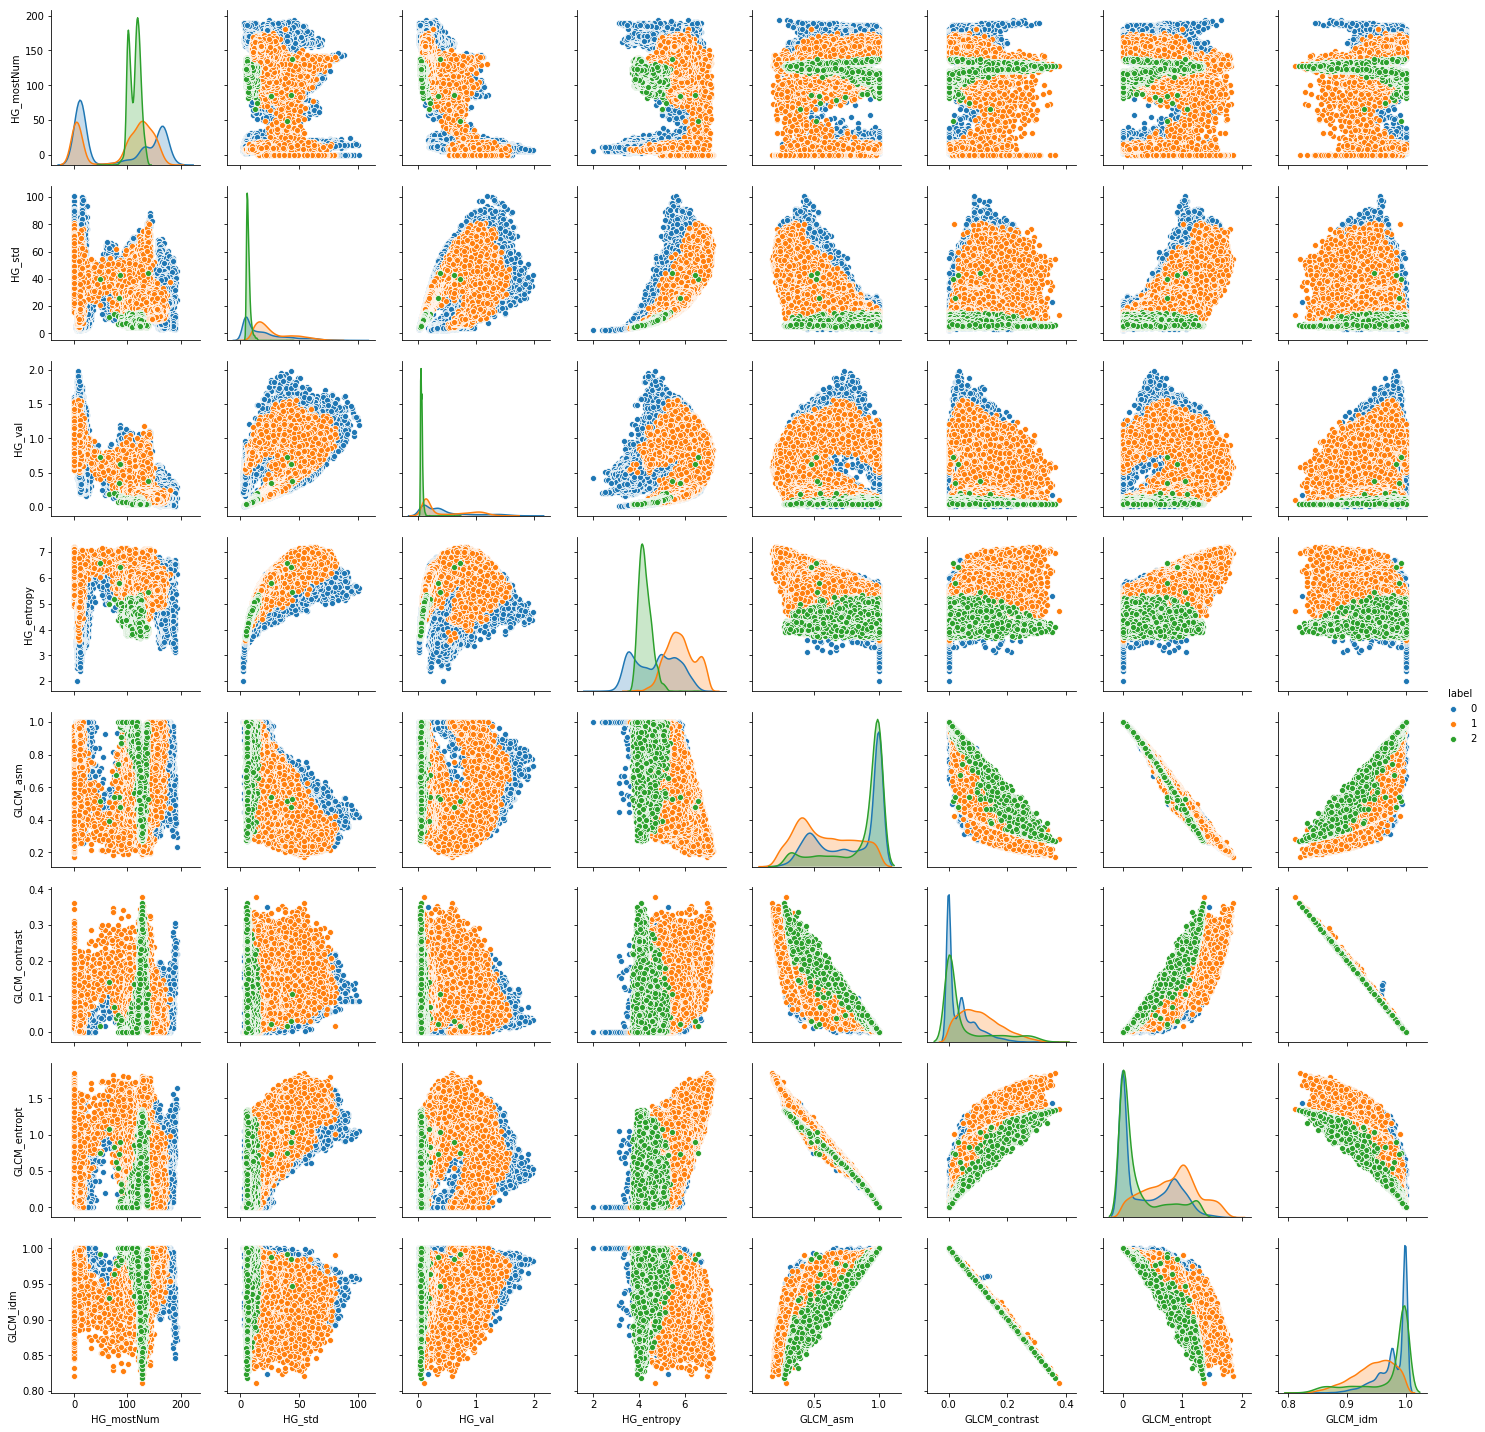

In [11]:
show_features = ["HG_mostNum", "HG_std", "HG_val", "HG_entropy","GLCM_asm","GLCM_contrast","GLCM_entropt","GLCM_idm"]
sns.pairplot(data=csv_data, hue="label", x_vars=show_features, y_vars=show_features)

### 挑選了有辦法肉眼分類的特徵來當作我們訓練用的特徵 :  HG_entropy於HG_std , HG_val(可肉眼分三類)
###            分1跟2兩類的特徵(代表1類可能事範圍極小的圓)，並且去掉重複的: GLCM的asm和entropy於idm 

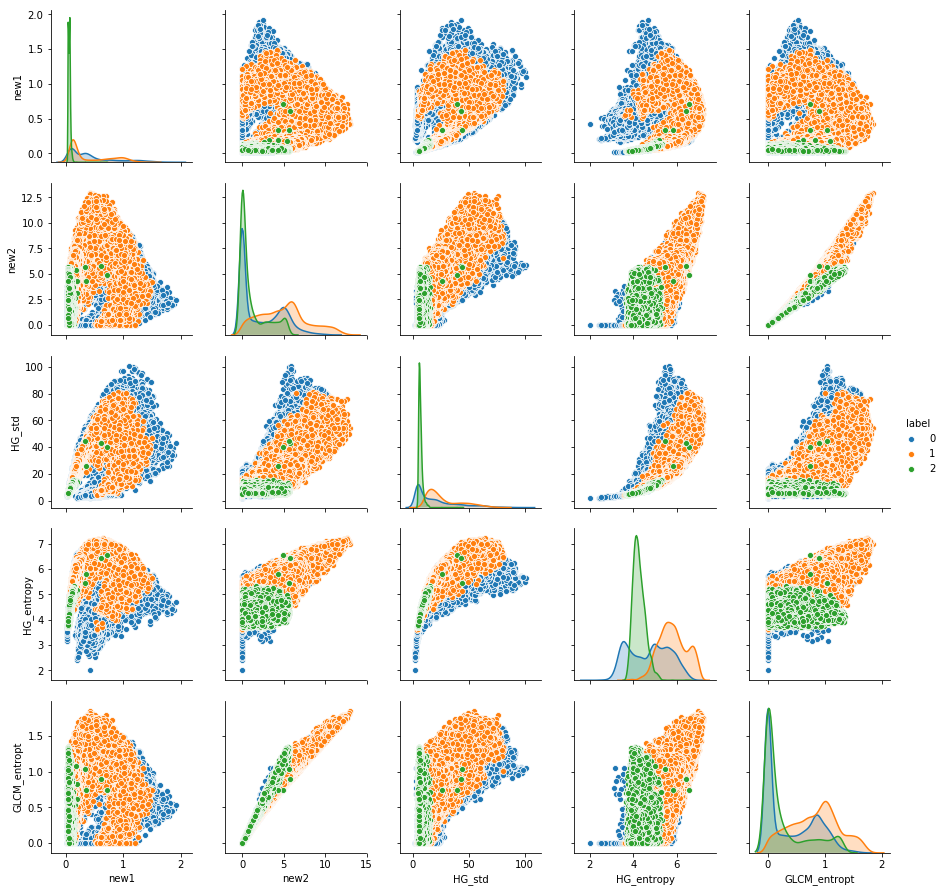

In [12]:
#將這兩種結合創造新的特徵看可否明顯地分出三類
#csv_data['new1'] = csv_data["HG_entropy"] / csv_data["GLCM_idm"]             0.951
#csv_data['new2'] = csv_data["HG_entropy"] / csv_data["HG_val"]

csv_data['new1'] = csv_data["HG_val"] / (csv_data["GLCM_contrast"]+1)
csv_data['new2'] = csv_data["HG_entropy"] * csv_data["GLCM_entropt"]
show_features = ["new1", "new2"  , "HG_std" ,"HG_entropy" ,"GLCM_entropt"]
sns.pairplot(data=csv_data, hue="label", x_vars=show_features, y_vars=show_features)

In [13]:
#可明顯分離正常狀態k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
model = SVC(C = 1.0 ,kernel = 'rbf',random_state=0 ,decision_function_shape = 'ovo',gamma = 0.5)
features = ["new1" , "new2","HG_entropy","HG_mostNum", "HG_std", "GLCM_asm","GLCM_entropt"]
Features = csv_data[features]
Label = csv_data['label']


In [14]:
accuracies = []
confmats = []
for train_index, test_index in k_fold.split(Label):
    #print(np.shape(test_index))
    #print(np.shape(train_index))
    trained = model.fit(Features.loc[train_index].values, Label.loc[train_index].values)
    X_test = Features.loc[test_index].values
    y_test = Label.loc[test_index].values
    accuracies.append(trained.score(X_test, y_test))
    y_pred = model.predict(X_test)
    confmats.append(metrics.confusion_matrix(y_test, y_pred))

In [15]:
accuracies

[0.9062754686226568,
 0.9070904645476773,
 0.9068061404700448,
 0.9092514603994023,
 0.9115609292215732]

In [16]:
acc = np.array(accuracies)
print("平均值 = {:f}".format(np.average(acc)))              #0.953747
print("標準差 = {:f}".format(np.std(acc)))                  #0.003545

平均值 = 0.908197
標準差 = 0.001964


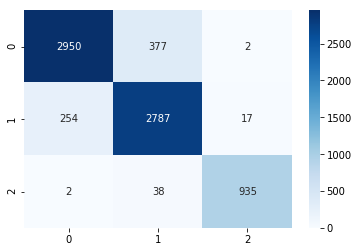

In [17]:
sns.heatmap(confmats[0], cmap="Blues", annot=True, fmt="d")

In [ ]:
sns.heatmap(confmats[1], cmap="Blues", annot=True, fmt="d")

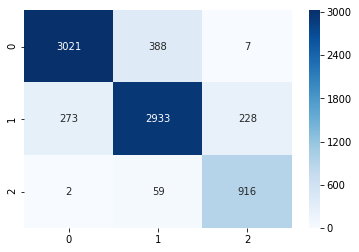

In [17]:
sns.heatmap(confmats[2], cmap="Blues", annot=True, fmt="d")

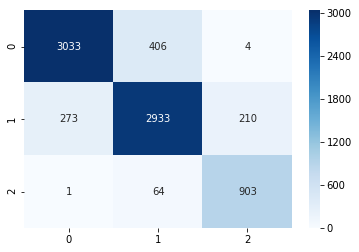

In [18]:
sns.heatmap(confmats[3], cmap="Blues", annot=True, fmt="d")

In [ ]:
sns.heatmap(confmats[4], cmap="Blues", annot=True, fmt="d")